# Assignment 3

## Objective of this assignment
The objective of this exercise is to become familiar with fitting decision trees and
making ROC curves in Python.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, Introduction to Data Mining, section 4.1-4.6, as well as the included article on ROC curves.


## 3.1 Decision trees

In this part of the exercise we will fit decision trees using the scikitlearn classifier
`sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses
one of the following two impurity measures:

\begin{equation} \textrm{gdi}(t) = -\sum_{i=1}^C p(i|t)^2 \quad \text{       equivalent to Gini(t)} \end{equation}   

\begin{equation}
\textrm{deviance}(t) = -2\sum_{i=1}^C p(i|t) \log p(i|t) \quad \text{equivalent to Entropy(t)} 
\end{equation}

We will analyze the wine data we have used previously. The wine data set has the following attributes, all of which are continuous: 


| #             | Attribute     | Unit  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | g/dm$^3$ |
|2 | Volatile acidity (acetic) | g/dm$^3$ |
|3 | Citric acid | g/dm$^3$ |
|4 | Residual sugar | g/dm$^3$ |
|5 | Chlorides | g/dm$^3$ |
|6 | Free sulfur dioxide | mg/dm$^3$ |
|7 | Total sulfur dioxide | mg/dm$^3$ |
|8 | Density | g/cm$^3$ |
|9 | pH | pH |
|10 | Sulphates | g/dm$^3$ |
|11 | Alcohol | % vol. | 


#### 3.1.1
(0.5 pts) Load the wine data set `Data/wine.mat` using the `scipy.io` `loadmat` function. This contains the same data as used in the earlier assignment, but with outliers and the 12th attribute already removed. Create data matrix $X$, class vector $y$, and the lists $attributeNames$ and $classNames$ with the data provided in the `wine.mat` file. Print out the  $attributeNames$ and $classNames$ to make sure it's a list of strings.

   ** hints: **   
*The object in wine.mat is a dictionary. The attributes are stored in matrix $X$, the class in vector $y$. $y$ is shaped as an array containing single element arrays. To flatten $y$, you can use `y.ravel()`, which unravels matrices into a 1d array. Attribute names and class names are stored in the attributeNames and classNames objects, which contain arrays, of which the first element contains the names. To get the names from those arrays, you can use list comprehension or for-loops. For more on list comprehension, check https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3. For example, if you have an larger array containing nested arrays of which you want the first element, you can try `new_array = [nested_array[0] for nested_array in larger_array]`.*



In [29]:
import pandas as pd
import scipy.io
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = scipy.io.loadmat("Data/wine.mat")
X = np.asarray(data['X'])
y = np.asarray(data['y']).ravel()
attributeNamesData = data['attributeNames'][0]
classNamesData = data['classNames'][:,0]

attributeNames = np.empty(len(attributeNamesData), dtype='U25')
for index in range(len(attributeNamesData)):
    attributeNames[index] = attributeNamesData[index][0]
classNames = np.empty(len(classNamesData), dtype='U10')
for index in range(len(classNamesData)):
    classNames[index] = classNamesData[index][0]
    
print(X)
print(y)
print(attributeNames)
print(classNames)

[[ 7.4   0.7   0.   ...  3.51  0.56  9.4 ]
 [ 7.8   0.88  0.   ...  3.2   0.68  9.8 ]
 [ 7.8   0.76  0.04 ...  3.26  0.65  9.8 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
[0 0 0 ... 1 1 1]
['Fixed acidity' 'Volatile acidity' 'Citric acid' 'Residual sugar'
 'Chlorides' 'Free sulfur dioxide' 'Total sulfur dioxide' 'Density' 'pH'
 'Sulphates' 'Alcohol']
['Red' 'White']


#### 3.1.2
 (1.5 pts) Fit a decision tree to the wine data in order to estimate if the wine is red or white. Use the Gini (gdi) splitting criterion. Use `min_samples_split=100` for the stopping criterion. Explain what happens when you change the values of the parameter `min_samples_split`. After fitting the tree, visualize it with the tree_print function in `treeprint.py` in the Toolbox folder. 

** hints: **   
*The `treeprint.py` file contains some documentation on how to use it. Helpfull documentation for the DecisionTreeClassifier function can be found at * http://scikit-learn.org/stable/modules/tree.html#classification  



In [30]:
from sklearn import tree
import Toolbox.treeprint as tp

clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=100)
clf = clf.fit(X, y)

tp.tree_print(clf,attributeNames,classNames)

         |->3  White
         |
      |->2 then if Sulphates =< 0.56: go to 3, else go to 4
      |  |
      |  |->4  White
      |
   |->1 then if Chlorides =< 0.05: go to 2, else go to 5
   |  |
   |  |  |->6  White
   |  |  |
   |  |->5 else if Sulphates =< 0.37: go to 6, else go to 7
   |     |
   |     |  |->8  White
   |     |  |
   |     |->7 else if Density =< 0.99: go to 8, else go to 9
   |        |
   |        |     |->11  White
   |        |     |
   |        |  |->10 then if Residual sugar =< 1.10: go to 11, else go to 12
   |        |  |  |
   |        |  |  |  |->13  Red
   |        |  |  |  |
   |        |  |  |->12 else if Density =< 0.99: go to 13, else go to 14
   |        |  |     |
   |        |  |     |  |->15  Red
   |        |  |     |  |
   |        |  |     |->14 else if Chlorides =< 0.05: go to 15, else go to 16
   |        |  |        |
   |        |  |        |  |->17  Red
   |        |  |        |  |
   |        |  |        |->16 else if Sulphates =< 0.45:

----
#### Answer 3.1.2
The min_samples_split parameter determines the minimum amount of samples necessary in a node for it to be eligable for further splitting. By default it's set to 2, which means that the algorithm will split a node with 2 samples of differing classes into 2 new nodes with 1 entry. If we increase min_samples_split to 100 that wouldn't happen. Only a node with more than or equal to 100 samples with some difference would be split.

----

#### 3.1.3

(0.5 pts) Show that a wine with the following attribute values would be classified as white by the tree fitted in 3.1.2, by applying the `predict()` function from the DecisionTreeClassifier to this sample.  Have another look at the visualized tree. Which attributes are used to classify this wine? 

| #             | Attribute     | Value  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | 6.9 g/dm$^3$ |
|2 | Volatile acidity (acetic) | 1.09 g/dm$^3$ |
|3 | Citric acid | 0.06 g/dm$^3$ |
|4 | Residual sugar | 2.1 g/dm$^3$ |
|5 | Chlorides | 0.0061 g/dm$^3$ |
|6 | Free sulfur dioxide | 12 mg/dm$^3$ |
|7 | Total sulfur dioxide | 31 mg/dm$^3$ |
|8 | Density | 0.99 g/cm$^3$ |
|9 | pH | 3.5 |
|10 | Sulphates | 0.64 g/dm$^3$ |
|11 | Alcohol | 12 % vol. | 

** hints: **
*If you don't know how to classify input values with a tree, see the help documentation for the DecisionTreeClassifier function on how to predict the label for a sample. *

In [136]:
print(classNames[clf.predict([[6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.64, 12]])[0]])

White


----
#### Answer 3.1.3
The prediction shows that this wine is white, since 1 corresponds to the second entry in the classNames array, which is white. 
The tree splits that are relevant to this example are as follows in order:
1. total sulfur dioxide =< 66.50
2. chlorides =< 0.05
3. sulphates > 0.56
At this split it ends up in 4, which is an end-node for white wine.
----

#### 3.1.4
(1 pts) Classify all the wines in the wine data set. What percentage of the wine data is classified correctly by the tree?



In [31]:
correct = 0
for index in range(len(X)):
    if(clf.predict([X[index]])[0] == y[index]):
        correct += 1
print("Amount of samples= "+str(len(X)))
print("Amount of correctly classified samples= "+str(correct))

Amount of samples= 6304
Amount of correctly classified samples= 6221


----
#### Answer 3.1.4
From the two values given by the above output we can calculate that the percentage of correctly classified wine samples by the tree is equal to: 6221/6304*100 ≈ 98.7%

----

## 3.2 Decision tree pruning using cross-validation

In this exercise we will use cross-validation to prune a decision tree. When applying cross-validation the observed data is split into training and test sets, i.e., `X_train`, `y_train` and `X_test` and `y_test`. We train the model on the training data and evaluate the performance of the trained model on the test data.

#### 3.2.1
(2 pts) We are again using the wine data set `Data/wine.mat`. Divide the data into a training and a test data set (see hints!). Fit a decision tree to the training data using the Gini (`gdi`) splitting criterion.

Now, we want to find an optimally pruned decision tree by *modifying its maximum depth*. For different values of the parameter `depth` (from 2 to 20), 
+ first fit the decision tree
+ then compute the classification error on the training and test set (this is called holdout cross-validation)

When you've done this for `depth` values 2,...,20, plot the training and test classification error as a function of the tree depth in the same figure. This will show us what the optimal pruning depth is for the training set, but also how well this generalizes to a test set. 


** hints: **  
*Take a look at the module `sklearn.model_selection` and see how it can be used to partition the data into a training and a test set (holdout validation, `train_test_split()` function). Note that the package also contains functions to partition data for K-fold cross-validation. Some of the functions can ensure that both training and test sets have roughly the same class proportions. The error is 1-accuracy. The easiest way to compute the accuracy is by using the sklearn metrics module: 
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data?


In [32]:
from sklearn import model_selection as ms
import matplotlib.pyplot as plt
import numpy as np

# split data
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.33)

error_train = np.zeros(21);
error_test = np.zeros(21);
for depth in range(2,21):
    # fit tree
    print("Fitting tree for depth = "+str(depth))
    clf_train = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=100, max_depth=depth)
    clf_train = clf_train.fit(X_train, y_train)

    # compute error
    correct_train = 0;
    correct_test = 0;
    for index in range(len(X_train)):
        if(index < len(X_train) and clf_train.predict([X_train[index]])[0] == y_train[index]):
            correct_train += 1
        if(index < len(X_test) and clf_train.predict([X_test[index]])[0] == y_test[index]):
            correct_test += 1
    
    error_train[depth] = 1-correct_train/len(X_train)
    error_test[depth] = 1-correct_test/len(X_test)
    print("\tClassification error on training set = "+str(error_train[depth]))
    print("\tClassification error on testing set = "+str(error_test[depth]))

Fitting tree for depth = 2
	Classification error on training set = 0.04262372720814589
	Classification error on testing set = 0.04901489668428638
Fitting tree for depth = 3
	Classification error on training set = 0.02391664693345963
	Classification error on testing set = 0.031234983181162912
Fitting tree for depth = 4
	Classification error on training set = 0.013734312100402546
	Classification error on testing set = 0.0211436809226333
Fitting tree for depth = 5
	Classification error on training set = 0.011839924224484988
	Classification error on testing set = 0.017299375300336428
Fitting tree for depth = 6
	Classification error on training set = 0.011603125739995224
	Classification error on testing set = 0.016338298894762127
Fitting tree for depth = 7
	Classification error on training set = 0.011603125739995224
	Classification error on testing set = 0.016338298894762127
Fitting tree for depth = 8
	Classification error on training set = 0.011603125739995224
	Classification error on test

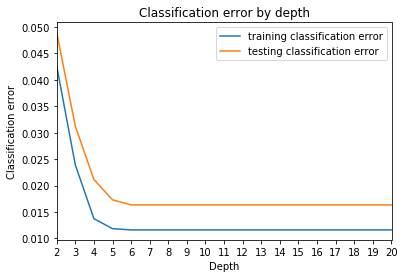

Representation of the classification error in training and testing sets of the fitted tree at different depths.


In [35]:
# plot
plt.plot(range(2,21), error_train[2:])
plt.plot(range(2,21), error_test[2:])

plt.xticks(np.arange(2, 21, step=1))
plt.xlim([2, 20])

plt.title("Classification error by depth")
plt.xlabel("Depth")
plt.ylabel("Classification error")
plt.legend(['training classification error', 'testing classification error'], loc='upper right')
plt.show()
print("Representation of the classification error in training and testing sets of the fitted tree at different depths.")

----
#### Answer 3.2.1
From the plot we can see that the classification error for both datasets stagnates after depth 6. However, the result changes on every run of the code, because the split between training and test data is different. I would therefore say that depth 7 is the optimal depth for pruning. Any further splits yield no improvement in classification.

----

#### 3.2.2
(1.5 pts) Repeat the exercise above, using 10-fold cross-validation. K-fold cross-validation works by splitting X into K partitions of equal length. Then in each fold, you choose K-1 partitions as the training set and the remaining partition as the test set. Every partition gets a turn being a test set. For a very nice simple explanation of how (and why) K-fold works, check out http://www.dummies.com/programming/big-data/data-science/resorting-cross-validation-machine-learning/


For each fold, fit a decision tree on the training set and evaluate its performance on the test set. Finally, compute the average classification errors on the test- and training sets across the 10 cross-validation folds and plot them as a function of the tree depth.

** hints: **
*This time the `KFold()` function from the module `sklearn.model_selection` can be used to partition the data into the 10 training and test partitions. Check out http://scikit-learn.org/stable/modules/cross_validation.html#k-fold for an example of how to acces the indices for the training set and the test set in each fold. Those indices can then be used to create the training and test set, e.g. `X_train = X[train_indices]`*

*If you are creating a for loop iterating over an object where you both need the index and the elements of the object, you can enumerate the object. For example:*

`
for index, (element) in enumerate(object):
    array[index] = operation(element)
`
 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data? How about 100-fold cross-validation?


In [36]:
from sklearn.model_selection import KFold

folds = 10

kf = KFold(n_splits=folds)
kf.get_n_splits(X)

avg_error_train = np.zeros(21);
avg_error_test = np.zeros(21);
for depth in range(2,21):
    
    print("\nTrees for depth = "+str(depth))
    error_train_kfold = np.zeros(folds);
    error_test_kfold = np.zeros(folds);
        
    for kfold_index, (train_index, test_index) in enumerate(kf.split(X)):

        print("\tKfold = "+str(kfold_index+1))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        # fit tree
        clf_train = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=100, max_depth=depth)
        clf_train = clf_train.fit(X_train, y_train)

        # compute error
        correct_train = 0;
        correct_test = 0;
        for index in range(len(X_train)):
            if(index < len(X_train) and clf_train.predict([X_train[index]])[0] == y_train[index]):
                correct_train += 1
            if(index < len(X_test) and clf_train.predict([X_test[index]])[0] == y_test[index]):
                correct_test += 1

        error_train_kfold[kfold_index] = 1-correct_train/len(X_train)
        error_test_kfold[kfold_index] = 1-correct_test/len(X_test)
        print("\t\tClassification error on training set = "+str(error_train_kfold[kfold_index]))
        print("\t\tClassification error on testing set = "+str(error_test_kfold[kfold_index]))
        
        kfold_index+=1
    
    for error in error_train_kfold:
        avg_error_train[depth] += error
    for error in error_test_kfold:
        avg_error_test[depth] += error
        
    avg_error_train[depth] /= folds
    avg_error_test[depth] /= folds
    print("\nAverage classification error on training set at depth "+str(depth)+" = "+str(avg_error_train[depth]))
    print("Average classification error on testing set at depth "+str(depth)+" = "+str(avg_error_test[depth]))
        


Trees for depth = 2
	Kfold = 1
		Classification error on training set = 0.039837828309536416
		Classification error on testing set = 0.3026941362916006
	Kfold = 2
		Classification error on training set = 0.039309007579763744
		Classification error on testing set = 0.2266244057052298
	Kfold = 3
		Classification error on training set = 0.035959809624537264
		Classification error on testing set = 0.03961965134706813
	Kfold = 4
		Classification error on training set = 0.04406839414771724
		Classification error on testing set = 0.05229793977812991
	Kfold = 5
		Classification error on training set = 0.04458935495241456
		Classification error on testing set = 0.04603174603174598
	Kfold = 6
		Classification error on training set = 0.03894959464222769
		Classification error on testing set = 0.014285714285714235
	Kfold = 7
		Classification error on training set = 0.037715897074374394
		Classification error on testing set = 0.020634920634920673
	Kfold = 8
		Classification error on training set =

		Classification error on training set = 0.017976735988720516
		Classification error on testing set = 0.01904761904761909
	Kfold = 7
		Classification error on training set = 0.019034191046880533
		Classification error on testing set = 0.015873015873015928
	Kfold = 8
		Classification error on training set = 0.013218188227000383
		Classification error on testing set = 0.012698412698412653
	Kfold = 9
		Classification error on training set = 0.019034191046880533
		Classification error on testing set = 0.014285714285714235
	Kfold = 10
		Classification error on training set = 0.014628128304547072
		Classification error on testing set = 0.014285714285714235

Average classification error on training set at depth 7 = 0.014787641289919972
Average classification error on testing set at depth 7 = 0.03345382738409679

Trees for depth = 8
	Kfold = 1
		Classification error on training set = 0.012867971091133468
		Classification error on testing set = 0.07131537242472263
	Kfold = 2
		Classification er

		Classification error on training set = 0.012339150361360796
		Classification error on testing set = 0.0649762282091918
	Kfold = 2
		Classification error on training set = 0.008284858099770864
		Classification error on testing set = 0.10301109350237714
	Kfold = 3
		Classification error on training set = 0.015335801163405605
		Classification error on testing set = 0.057052297939778174
	Kfold = 4
		Classification error on training set = 0.014278159703860371
		Classification error on testing set = 0.009508716323296307
	Kfold = 5
		Classification error on training set = 0.013218188227000383
		Classification error on testing set = 0.01746031746031751
	Kfold = 6
		Classification error on training set = 0.017976735988720516
		Classification error on testing set = 0.01904761904761909
	Kfold = 7
		Classification error on training set = 0.019034191046880533
		Classification error on testing set = 0.015873015873015928
	Kfold = 8
		Classification error on training set = 0.013218188227000383
		Cla

		Classification error on training set = 0.017976735988720516
		Classification error on testing set = 0.01904761904761909
	Kfold = 7
		Classification error on training set = 0.019034191046880533
		Classification error on testing set = 0.015873015873015928
	Kfold = 8
		Classification error on training set = 0.013218188227000383
		Classification error on testing set = 0.012698412698412653
	Kfold = 9
		Classification error on training set = 0.01885794853718714
		Classification error on testing set = 0.014285714285714235
	Kfold = 10
		Classification error on training set = 0.013923158265773727
		Classification error on testing set = 0.014285714285714235

Average classification error on training set at depth 18 = 0.014646637962096032
Average classification error on testing set at depth 18 = 0.032819912962543704

Trees for depth = 19
	Kfold = 1
		Classification error on training set = 0.012339150361360796
		Classification error on testing set = 0.0649762282091918
	Kfold = 2
		Classification 

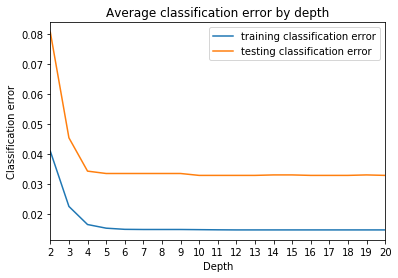

Average classification error for training and testing sets using K-fold cross-validation


In [38]:
# plot
plt.plot(range(2,21), avg_error_train[2:])
plt.plot(range(2,21), avg_error_test[2:])

plt.xticks(np.arange(2, 21, step=1))
plt.xlim([2, 20])

plt.title("Average classification error by depth")
plt.xlabel("Depth")
plt.ylabel("Classification error")
plt.legend(['training classification error', 'testing classification error'], loc='upper right')
plt.show()
print("Average classification error for training and testing sets using K-fold cross-validation")

----
#### Answer 3.2.2
In this case, after running the code a few times, it looks like the classification error in the test can still fluctuate up to depth 10, which is the optimal tree depth, looking to the above plot. When running the code again, just like 3.2.1, the result is different. 100-fold cross-validation resulted in more tiny fluctuation after depth 10 until depth 16, but these changes are so small (<1%) that for classification purposes it is negligible.

----

 ## 3.3 ROC curves, AUC scores, and the sign test

In this exercise we will use ROC curves and the sign test to compare classifiers. Study the lecture slides and the paper 'ROC Graphs: Notes and Practical Considerations for Researchers' by Tom Fawcett included with the homework assignment (ROC101.pdf). It describes all you need to know (and much, much more..) about ROC curves. The method explained for computing the area under the curve is unnecessarily complicated. A simpler formula is:
$$
    \mbox{AUC} = {1 \over m n} \sum_{i=1}^m \sum_{j=1}^n \mathbf{\large 1}_{p_i > p_j} \: .
   $$
Here $i$ runs over all $m$ data points with true label 1, and $j$ runs over all $n$ data points with true label $0$; $p_i$ and $p_j$ denote the probability score assigned by the classifier to data point $i$ and $j$, respectively. $\mathbf{\large 1}$ is the indicator function: it outputs $1$ if the condition (here $p_i > p_j$) is satisfied and $0$ otherwise. *Simply put: this formula computes how often the probability of a data point with true label 1 is higher than the probability of data points with true label 0. This is then divided by the total number of comparisons between probabilities.*
    

#### 3.3.1
(0.25 pts) To make sure you understand how ROC works, make an ROC curve and calculate the AUC (on paper) with the following data:

`
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
`
    
What's the AUC you calculated? Do you think this classifier works well?


----
#### Answer 3.3.1
The AUC I calculated is 0.84. I think the classifier works quite well, since this is pretty close to 1 and way better than random guessing, which would have an AUC of 0.5.

----

#### 3.3.2
  Load the file `Data/classprobs.xls` using the Pandas `read_excel` function. Inspect the data and cast it to an array with the `.values` attribute. The first column gives the true class label (either 0 or 1). The second and third column give the probabilistic scores for two different classifiers. The higher this probability, the more certain the classifier is that the example belongs to class 1 (instead of class 0).


In [44]:
import pandas as pd

data = pd.read_excel("Data/classprobs.xls")
print(data.head())
X = data.values

   1.00000  0.88700   0.79706
0        0  0.13591  0.099401
1        0  0.55549  0.650750
2        0  0.23876  0.508570
3        0  0.14542  0.236290
4        1  0.81876  0.489490


#### 3.3.3
(1 pts) Calculate the ROC curves for both of the classifiers by calculating the FP and TP rates and plot them in the same plot. Make the plot yourself as opposed to using a library! Also plot a dashed line on the diagonal to represent random guessing in the same figure. Interpret the obtained results. Do both classifiers perform better than random guessing?

** hints: **  
*The function `sklearn.metrics.roc_curve` can be used for computing the FP and TP rates. You can then plot them using the `matplotlib.pyplot` `plot` function. Check the documentation on how to plot a dashed line. Remember to include a legend!* 

**An extra tip: the sign test example below includes a figure with dashed lines and a legend...**
 

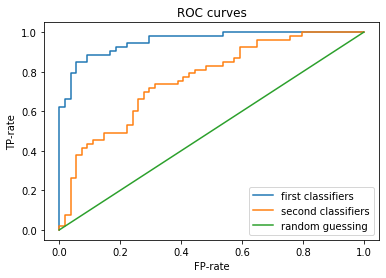

The two ROC curves calculated from the classprobs.xls dataset


In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr1, tpr1, thresholds1 = metrics.roc_curve(X[:,0], X[:,1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(X[:,0], X[:,2])

plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot([0,1],[0,1])

plt.title("ROC curves")
plt.xlabel("FP-rate")
plt.ylabel("TP-rate")
plt.legend(['first classifiers', 'second classifiers', 'random guessing'], loc='lower right')
plt.show()
print("The two ROC curves calculated from the classprobs.xls dataset")

----
#### Answer 3.3.3
From the above graph, it looks like both classifiers perform better than random guessing. The first classifiers (blue line), the second column in the dataset, performs significantly better than the second classifiers.

----

#### 3.3.4
(0.5 pts) Compute the AUC scores (area under the curve) of both classifiers using the formula given above. **Write your own code for this calculation.** Do the AUC scores indicate that the classifiers are performing better than this baseline?




 

In [83]:
AUC1 = AUC2 = m_length = 0

for i in range(len(X)):
    if(X[i,0] == 1):
        m_length += 1
        for j in range(len(X)):
            if X[j,0] == 0:
                if X[i,1] > X[j,1]:
                    AUC1 += 1
                if X[i,2] > X[j,2]:
                    AUC2 += 1

mn = m_length*(len(X)-m_length)
AUC1 /= mn
AUC2 /= mn

print("AUC1 = "+str(AUC1))
print("AUC2 = "+str(AUC2))

AUC1 = 0.9556254367575122
AUC2 = 0.7613556953179594


----
#### Answer 3.3.4
AUC1 > AUC2, so the AUC scores confirm that the classifiers both perform better than the baseline of random guessing with AUC=0.5.

----


#### 3.3.5
(0.25 pts) Using a threshold of 0.5, translate the probability scores to predicted class labels, and compute the accuracy for each of the classifiers.

** hint: **

*Take a look at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

In [87]:
predict1 = predict2 = np.array([])

for label, p1, p2 in X:
    if p1>=0.5:
        predict1 = np.append(predict1, 1)
    else:
        predict1 = np.append(predict1, 0)
    if p2>=0.5:
        predict2 = np.append(predict2, 1)
    else:
        predict2 = np.append(predict2, 0)
        
acc1 = metrics.accuracy_score(X[:,0], predict1)
acc2 = metrics.accuracy_score(X[:,0], predict2)
print("Accuracy of prediction of classifiers 1 = "+str(acc1))
print("Accuracy of prediction of classifiers 2 = "+str(acc2))     

Accuracy of prediction of classifiers 1 = 0.8598130841121495
Accuracy of prediction of classifiers 2 = 0.6915887850467289


#### 3.3.6
(1 pts) Create the 2x2 table (or array, or list, or dataframe..) of wrong and correct classifications by the first and the second classifier, like in the lecture slides (lecture on model evaluation, part on the sign test). Perform a sign test to test whether the performance of the two classifiers is significantly different at a significance level of 0.05. **If you are not familiar with sign testing, you can read the example provided below.**


** hints: **  
*As explained in the lecture slides, the sign test is a binomial test on the lower-left ($N_{1<2}$) and upper-right ($N_{1>2}$) elements of the cross table. Unlike in the lecture slides, here you need to perform a two-sided test: $$\textrm{p-value} = P(W \leq \min(N_{1<2},N_{1>2}) \textrm{ or } W \geq  \max(N_{1<2},N_{1>2})$$
The function `scipy.stats.binom.cdf` can be used to compute the cumulative density of the binomial distribution.
For more information on the sign test, see the included paper by Salzberg (signtest.pdf, in particular section 3.1).*

In [116]:
from scipy.stats import binom

# create array
signArray = np.zeros((2,2))
for i in range(len(X)):
    if(predict1[i] == predict2[i] == X[i,0]):
        signArray[0,0] += 1
    elif(predict1[i] != predict2[i] == X[i,0]):
        signArray[1,0] += 1
    elif(predict2[i] != predict1[i] == X[i,0]):
        signArray[0,1] += 1
    elif(predict1[i] == predict2[i] != X[i,0]):
        signArray[1,1] += 1
print(signArray)

# sign test
N_r = signArray[0,1]
N_l = signArray[1,0]
b = binom(N_r+N_l,0.5)
p = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))

print("P-value = "+str(p))

[[66. 26.]
 [ 8.  7.]]
P-value = 0.0029350556433200854


----
#### Answer 3.3.6
The P-value is about 0.003, which is quite a bit less than our significance level of 0.05. Therefore, we have a significant difference between the two models. The first classifiers are better than the second.

----

## Example two-sided sign test

Imagine you have a lucky coin, that you are certain does not result in heads 50% of the times you flip it. However, you friend (lets call him *zero_hypothesis*) claims that your coin is just like his random coin. To verify whether this is true, you decide to compare the performance (you are a scientist after all) of your lucky coin resulting in heads to the performance of his random coin resulting in heads with a sign test. How do you do this?

First, you collect data. Assume you place 23 bets. During those 23 bets, you both flip your respective coins. It was determined that if one of you flipped head while the other didn't, that person won the bet, and the other person lost. If you both got the same outcome, neither of you won. 1 stands for head, and 0 for tails. These were your results:

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

#results
lucky_coin = np.array([1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1])
random_coin= np.array([0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0])

print('----------lucky | random \n',*['bet {:<5}  | {} | {}\n'.format(t[0],t[1],t[2]) for t in zip(range(0,len(lucky_coin)),lucky_coin,random_coin)],'-----\n')

----------lucky | random 
 bet 0      | 1 | 0
 bet 1      | 1 | 1
 bet 2      | 1 | 0
 bet 3      | 0 | 1
 bet 4      | 1 | 0
 bet 5      | 1 | 1
 bet 6      | 1 | 0
 bet 7      | 1 | 0
 bet 8      | 1 | 0
 bet 9      | 0 | 1
 bet 10     | 1 | 0
 bet 11     | 1 | 1
 bet 12     | 1 | 0
 bet 13     | 1 | 1
 bet 14     | 0 | 1
 bet 15     | 1 | 1
 bet 16     | 1 | 1
 bet 17     | 0 | 0
 bet 18     | 1 | 0
 bet 19     | 1 | 0
 bet 20     | 1 | 0
 bet 21     | 0 | 0
 bet 22     | 1 | 0
 -----



Now you calculate how often in any pair of outcomes one coin *won*, i.e. one coin flipped to head while the other flipped to tails.

In [2]:
N_l = sum((lucky_coin == 1) & (random_coin == 0)) #how often your lucky coin won
N_r = sum((lucky_coin == 0) & (random_coin == 1)) #how often the random coin won
N = N_l + N_r #how often one coin was a winner
print('The lucky coin won {} times, while the random won {} times.'.format(N_l,N_r))

The lucky coin won 12 times, while the random won 3 times.


You observed 15 times that one coin won. If both coins resulted in heads 50% of the time, like *zero_hypothesis* stated, you'd expect that both coins have 50% chance of being the winner. So the probability distributions for both N_l and N_r should look something like this, assuming that *zero_hypothesis* is right:

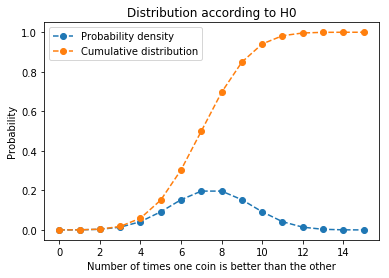

In [3]:
b = binom(N,0.5) #N=observations of inequality, p=prob of one coin being better, which is 0.5 according to your H0
plt.plot(b.pmf(range(N+1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N+1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one coin is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

(Of course this is a discrete probability function, so you're not interested in values between integers.)

As you can see, according to *zero_hypothesis*, 7 and 8 are the most likely values for both N_l and N_r. But this is not what you observed in your data. To conclude that *H0* is false, you need to show that your outcome is unlikely under the assumption that *H0* is true: the values you observed are so extreme that these values or more extreme values occur less than 5% of the time (*p-value < 0.05*). So how unlikely is it that one coin is better 12 times or more, and the other is better 3 times or less?

It's the sum of the values of the probability density function (pdf or pmf in the python doc) at  0,1,2 and 3, plus the sum of the values of the pdf at 12,13,14 and 15. 

This is equal to the value of the cumulative distribution function (cdf) at 3, plus 1 minus the value of cdf at 11 (since `1-cdf(11)` represents the probability of observing 12 or bigger).

In [4]:
p_value = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print('The p-value is {:.3f}'.format(p_value))

The p-value is 0.035


So your observations are very unlikely if *zero_hypothesis* is right. By statistical theory, you can now say that you have significant reason to reject their opinion. Now the hardest part of statistics: convincing your non-scientist friends.